In [2]:
import json
from collections import Set
import numpy as np

with open("data/train.json") as json_file:
    training_data = json.load(json_file)
    ingredient_set = []
    cuisine_set = []
    for data_point in training_data:
        for ingredient in data_point["ingredients"]:
            ingredient_set.append(ingredient)
            
            cuisine_set.append(data_point["cuisine"])
    
    ingredient_set = set(ingredient_set)
    cuisine_set = set(cuisine_set)
    
    ingredient_array = list(ingredient_set)
    cuisine_array = list(cuisine_set)
    
    #ingredient_array is a list of all possible ingredients in all recipes
    #cuisine_array is a list of all possible cuisines in all recipes
    
    # setting up data_matrix
    
    training_input_matrix = np.empty(shape = (len(training_data),len(ingredient_array)))
    training_output_matrix = np.empty(shape = (len(training_data),len(cuisine_array)))
    
    for i, data_point in enumerate(training_data):
        ingredients = data_point["ingredients"]
        
        ingredients_vector = np.zeros(shape=(len(ingredient_array)))
        cuisine_vector = np.zeros(shape=(len(cuisine_array)))
        
        for ingredient in ingredients:
            ingredients_vector[ingredient_array.index(ingredient)] = 1
        
        cuisine_vector[cuisine_array.index(data_point["cuisine"])] = 1
        
        training_input_matrix[i] = ingredients_vector
        training_output_matrix[i] = cuisine_vector


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation

def model_generator():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim=len(ingredient_array)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(20, activation='softmax'))

    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

intial_model = model_generator()
history = intial_model.fit(training_input_matrix, training_output_matrix, validation_split=0.20, epochs=15, batch_size=256)

Train on 31819 samples, validate on 7955 samples
Epoch 1/15
31819/31819 [==============================] - 5s 160us/step - loss: 2.1411 - acc: 0.4447 - val_loss: 1.5340 - val_acc: 0.5915
Epoch 2/15
31819/31819 [==============================] - 4s 140us/step - loss: 1.2592 - acc: 0.6541 - val_loss: 1.0853 - val_acc: 0.6959
Epoch 3/15
31819/31819 [==============================] - 5s 142us/step - loss: 0.9400 - acc: 0.7386 - val_loss: 0.9198 - val_acc: 0.7419
Epoch 4/15
31819/31819 [==============================] - 4s 140us/step - loss: 0.7900 - acc: 0.7792 - val_loss: 0.8416 - val_acc: 0.7608
Epoch 5/15
31819/31819 [==============================] - 4s 138us/step - loss: 0.7002 - acc: 0.8022 - val_loss: 0.8064 - val_acc: 0.7684
Epoch 6/15
31819/31819 [==============================] - 4s 140us/step - loss: 0.6382 - acc: 0.8177 - val_loss: 0.7809 - val_acc: 0.7708
Epoch 7/15
31819/31819 [==============================] - 5s 142us/step - loss: 0.5913 - acc: 0.8294 - val_loss: 0.7682 - v

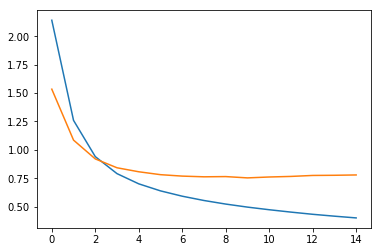

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

In [15]:
improved_model = model_generator()

improved_model.fit(training_input_matrix, training_output_matrix, validation_split=0.20, epochs=6, batch_size=256)

Train on 31819 samples, validate on 7955 samples
Epoch 1/6
31819/31819 [==============================] - 5s 159us/step - loss: 2.1080 - acc: 0.4565 - val_loss: 1.5024 - val_acc: 0.6146
Epoch 2/6
31819/31819 [==============================] - 4s 137us/step - loss: 1.2423 - acc: 0.6656 - val_loss: 1.0796 - val_acc: 0.6928
Epoch 3/6
31819/31819 [==============================] - 4s 138us/step - loss: 0.9429 - acc: 0.7364 - val_loss: 0.9267 - val_acc: 0.7350
Epoch 4/6
31819/31819 [==============================] - 4s 137us/step - loss: 0.8063 - acc: 0.7713 - val_loss: 0.8558 - val_acc: 0.7510
Epoch 5/6
31819/31819 [==============================] - 5s 144us/step - loss: 0.7212 - acc: 0.7951 - val_loss: 0.8186 - val_acc: 0.7677
Epoch 6/6
31819/31819 [==============================] - 4s 134us/step - loss: 0.6595 - acc: 0.8112 - val_loss: 0.7960 - val_acc: 0.7697


In [33]:
with open("data/test.json") as json_file:
    test_data = json.load(json_file)
    
    test_input_matrix = np.empty(shape = (len(test_data),len(ingredient_array)))
    test_id_array = []
    
    for i, data_point in enumerate(test_data):
        ingredients = data_point["ingredients"]
        
        ingredients_vector = np.zeros(shape=(len(ingredient_array)))
        
        for ingredient in ingredients:
            if ingredient in ingredient_array:
                ingredients_vector[ingredient_array.index(ingredient)] = 1
            
        test_input_matrix[i] = ingredients_vector
        test_id_array.append(data_point["id"])
        
    print(test_input_matrix.shape)

(9944, 6714)


In [37]:
results = improved_model.predict(test_input_matrix)


In [38]:
import csv

with open('test_results.csv', mode='w') as test_results:
    test_results = csv.writer(test_results, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

    test_results.writerow(["id", "cuisine"])
    
    for i in range(len(test_id_array)):
        result = [test_id_array[i], cuisine_array[np.argmax(results[i])]]
        test_results.writerow(result)